In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/219-DataMining/Project4/

/content/drive/MyDrive/219-DataMining/Project4


In [ ]:
pip install git+https://github.com/scikit-optimize/scikit-optimize.git

  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-qb6wc66i
  Running command git clone -q https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-qb6wc66i
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.0-py2.py3-none-any.whl size=100268 sha256=6c8fc36b8678600774caa6a26685e25ad8ca16e6795c42c5a09ad65fcdcc75c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-0624wmed/wheels/d6/9e/e3/8818f5597f06caa60393811f8aa57eb87b8565d772046d1b72
Successfully built scikit-optimize


In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import pydot
from IPython.display import Image

%matplotlib inline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPRegressor

from statsmodels.regression.linear_model import OLS
from skopt import BayesSearchCV
from catboost import CatBoostRegressor
import lightgbm as lgb

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# DIAMONDS REGRESSION ANALYSIS

# PREPROCESSING

In [ ]:
diamonds_df = pd.read_csv("./Dataset/Diamonds/diamonds.csv")

In [ ]:
diamonds_df.size, diamonds_df.shape

(593340, (53940, 11))

In [ ]:
d_df = diamonds_df
diamonds_df.tail(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2758,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2759,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2760,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2761,5.83,5.87,3.64


PREPROCESSING - HANDLING CATEGORICAL FEATURES

In [ ]:
diamonds_df = diamonds_df.replace(to_replace="Fair", value=1)
diamonds_df = diamonds_df.replace(to_replace="Good", value=2)
diamonds_df = diamonds_df.replace(to_replace="Very Good", value=3)
diamonds_df = diamonds_df.replace(to_replace="Premium", value=4)
diamonds_df = diamonds_df.replace(to_replace="Ideal", value=5)

In [ ]:
diamonds_df = diamonds_df.replace(to_replace="D", value=1)
diamonds_df = diamonds_df.replace(to_replace="E", value=2)
diamonds_df = diamonds_df.replace(to_replace="F", value=3)
diamonds_df = diamonds_df.replace(to_replace="G", value=4)
diamonds_df = diamonds_df.replace(to_replace="H", value=5)
diamonds_df = diamonds_df.replace(to_replace="I", value=6)
diamonds_df = diamonds_df.replace(to_replace="J", value=7)

In [ ]:
diamonds_df = diamonds_df.replace(to_replace="I1", value=1)
diamonds_df = diamonds_df.replace(to_replace="SI2", value=2)
diamonds_df = diamonds_df.replace(to_replace="SI1", value=3)
diamonds_df = diamonds_df.replace(to_replace="VS2", value=4)
diamonds_df = diamonds_df.replace(to_replace="VS1", value=5)
diamonds_df = diamonds_df.replace(to_replace="VVS2", value=6)
diamonds_df = diamonds_df.replace(to_replace="VVS1", value=7)
diamonds_df = diamonds_df.replace(to_replace="IF", value=8)

In [ ]:
diamonds_df.tail(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,5,1,3,60.8,57.0,2758,5.75,5.76,3.50
53936,53937,0.72,2,1,3,63.1,55.0,2759,5.69,5.75,3.61
53937,53938,0.70,3,1,3,62.8,60.0,2760,5.66,5.68,3.56
53938,53939,0.86,4,5,2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,5,1,2,62.2,55.0,2761,5.83,5.87,3.64


In [ ]:
diamonds_df = diamonds_df.drop(columns=["Unnamed: 0"])

QUESTION 2 - PEARSON CORRELATION COEFFICIENT

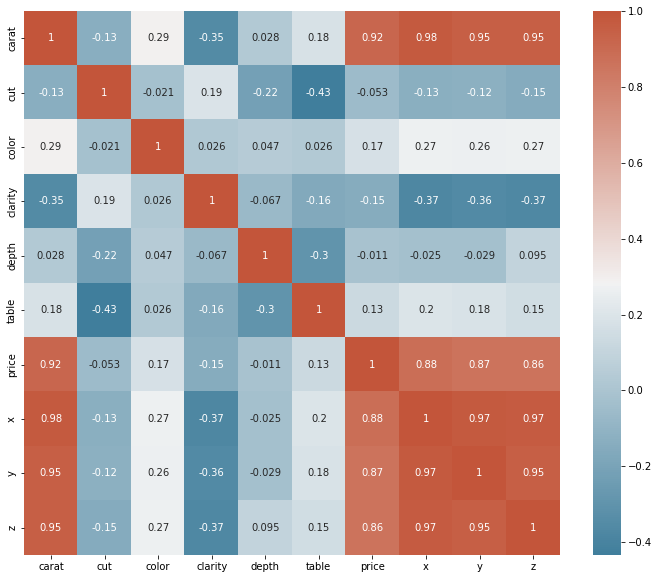

In [ ]:
diamonds_corr = diamonds_df.corr()

f, ax = plt.subplots(figsize=(12, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(diamonds_corr, annot=True, cmap=cmap)

QUESTION 1 - STANDARDIZATION

In [ ]:
diamond_labels = diamonds_df.pop("price")
scaled_diamond_labels = (diamond_labels - diamond_labels.mean()) / diamond_labels.std()

In [ ]:
diamonds_scaler = StandardScaler()
diamonds_features = diamonds_scaler.fit_transform(diamonds_df)

In [ ]:
diamonds_df.tail(5)

,carat,cut,color,clarity,depth,table,x,y,z
53935,0.72,5,1,3,60.8,57.0,5.75,5.76,3.50
53936,0.72,2,1,3,63.1,55.0,5.69,5.75,3.61
53937,0.70,3,1,3,62.8,60.0,5.66,5.68,3.56
53938,0.86,4,5,2,61.0,58.0,6.15,6.12,3.74
53939,0.75,5,1,2,62.2,55.0,5.83,5.87,3.64


QUESTION 3 - HISTOGRAMS

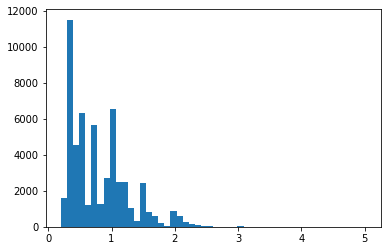

In [ ]:
carat = diamonds_df["carat"].values

plt.hist(carat, bins=50)
plt.show()

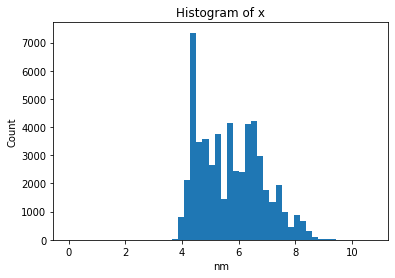

In [ ]:
x = diamonds_df["x"].values

plt.hist(x, bins=50)
plt.title("Histogram of x")
plt.xlabel("nm")
plt.ylabel("Count")
plt.show()

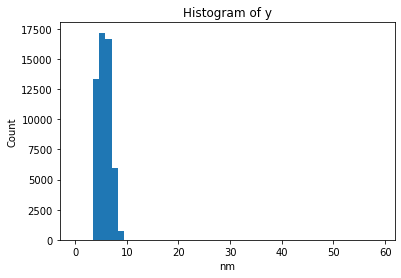

In [ ]:
y = diamonds_df["y"].values

plt.hist(y, bins=50)
plt.title("Histogram of y")
plt.xlabel("nm")
plt.ylabel("Count")
plt.show()

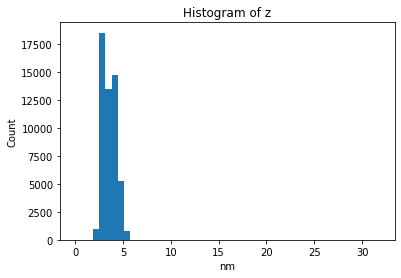

In [ ]:
z = diamonds_df["z"].values

plt.hist(z, bins=50)
plt.title("Histogram of z")
plt.xlabel("nm")
plt.ylabel("Count")
plt.show()

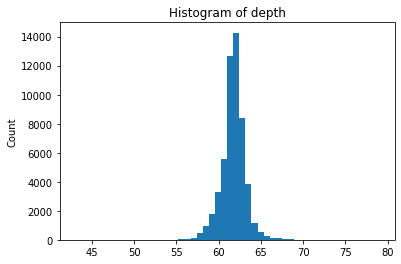

In [ ]:
depth = diamonds_df["depth"].values

plt.hist(depth, bins=50)
plt.title("Histogram of depth")
plt.ylabel("Count")
plt.show()

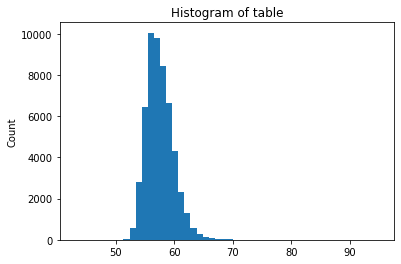

In [ ]:
table = diamonds_df["table"].values

plt.hist(table, bins=50)
plt.title("Histogram of table")
plt.ylabel("Count")
plt.show()

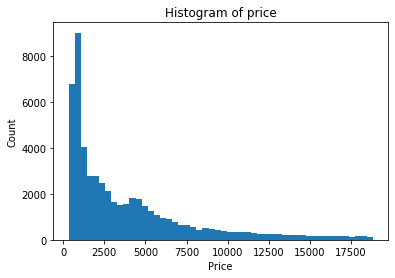

In [ ]:
plt.hist(diamond_labels, bins=50)
plt.title("Histogram of price")
plt.ylabel("Count")
plt.xlabel("Price")
plt.show()

QUESTION 4 - BOX PLOTS

In [ ]:
cut = diamonds_df["cut"]
color = diamonds_df["color"]
clarity = diamonds_df["clarity"]

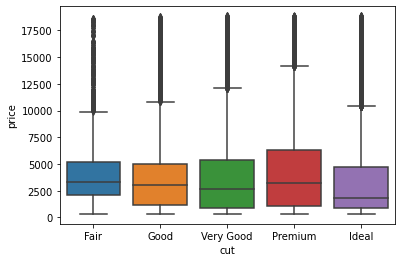

In [ ]:
sns.boxplot(x=cut, y=diamond_labels)
plt.xticks([0, 1, 2, 3, 4], ["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.show()

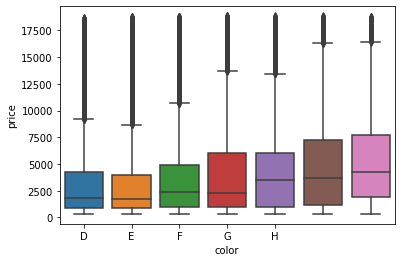

In [ ]:
sns.boxplot(x=color, y=diamond_labels)
plt.xticks([0, 1, 2, 3, 4], ["D", "E", "F", "G", "H", "I", "J"])
plt.show()

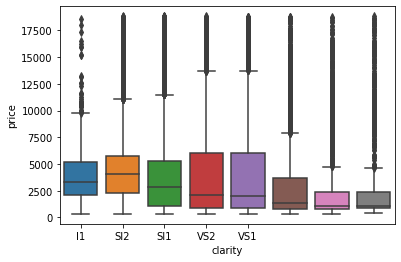

In [ ]:
sns.boxplot(x=clarity, y=diamond_labels)
plt.xticks([0, 1, 2, 3, 4], ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])
plt.show()

QUESTION 5 - COUNTS

In [ ]:
cut_label = d_df["cut"]
print(cut_label)
cut_cnt = collections.Counter(cut_label)
cut_freq = dict(cut_cnt)
print(cut_freq)

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object
{'Ideal': 21551, 'Premium': 13791, 'Good': 4906, 'Very Good': 12082, 'Fair': 1610}


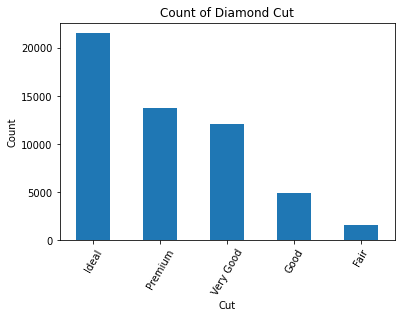

In [ ]:
cut_label.value_counts().plot(kind='bar')
plt.xticks(rotation = 60)
plt.xlabel("Cut")
plt.ylabel("Count")
plt.title("Count of Diamond Cut")
plt.show()

In [ ]:
color_label = d_df["color"]
print(color_label)
color_cnt = collections.Counter(color_label)
color_freq = dict(color_cnt)
print(color_freq)

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object
{'E': 9797, 'I': 5422, 'J': 2808, 'H': 8304, 'F': 9542, 'G': 11292, 'D': 6775}


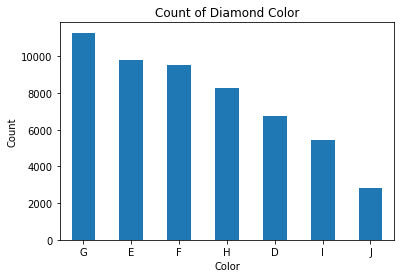

In [ ]:
color_label.value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Count of Diamond Color")
plt.show()

In [ ]:
clarity_label = d_df["clarity"]
print(clarity_label)
clarity_cnt = collections.Counter(clarity_label)
clarity_freq = dict(clarity_cnt)
print(clarity_freq)

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: object
{'SI2': 9194, 'SI1': 13065, 'VS1': 8171, 'VS2': 12258, 'VVS2': 5066, 'VVS1': 3655, 'I1': 741, 'IF': 1790}


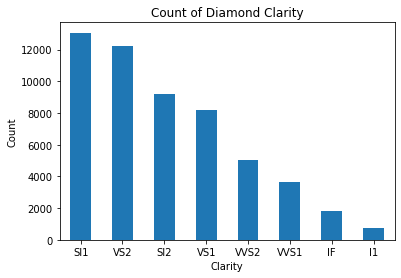

In [ ]:
clarity_label.value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.title("Count of Diamond Clarity")
plt.show()

# WITH SELECTING IMPORTANT FEATURES

# MUTUAL INFO REGRESSION

QUESTION 7 - FEATURE SELECTION

In [ ]:
def select(input, label, k, func="f"): # input the the features and label is price, for example
  if func == "mutual":
    k_model = SelectKBest(mutual_info_regression, k=k).fit(input, label)
  if func == "f":
    k_model = SelectKBest(f_regression, k=k).fit(input, label)
  input_new = k_model.transform(input)
  return input_new

In [ ]:
def regression(input, label, reg_type="linear"):
    if reg_type == "linear":
        output = cross_validate(LinearRegression(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    if reg_type == "lasso":
        output = cross_validate(Lasso(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    if reg_type == "ridge":
        output = cross_validate(Ridge(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    return output

LINEAR

In [ ]:
MIR_linear_diamond = list()
for k in range(1, diamonds_df.shape[1] + 1):
    input_k_modified = select(diamonds_df, diamond_labels, k=k, func="mutual")
    output = regression(input_k_modified, diamond_labels, reg_type="linear")
    MIR_linear_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
    MIR_linear_diamond.append(MIR_linear_diamond_rmse)

LASSO

In [ ]:
MIR_lasso_diamond = list()
for k in range(1, diamonds_df.shape[1] + 1):
    input_k_modified = select(diamonds_df, diamond_labels, k=k, func="mutual")
    output = regression(input_k_modified, diamond_labels, reg_type="lasso")
    MIR_lasso_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
    MIR_lasso_diamond.append(MIR_lasso_diamond_rmse)

RIDGE

In [ ]:
MIR_ridge_diamond = list()
for k in range(1, diamonds_df.shape[1] + 1):
    input_k_modified = select(diamonds_df, diamond_labels, k=k, func="mutual")
    output = regression(input_k_modified, diamond_labels, reg_type="ridge")
    MIR_ridge_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
    MIR_ridge_diamond.append(MIR_ridge_diamond_rmse)

# F REGRESSION

LINEAR

In [ ]:
F_linear_diamond = list()
for k in range(1, diamonds_df.shape[1] + 1):
    input_k_modified = select(diamonds_df, diamond_labels, k=k, func="f")
    output = regression(input_k_modified, diamond_labels, reg_type="linear")
    F_linear_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
    F_linear_diamond.append(F_linear_diamond_rmse)

LASSO

In [ ]:
F_lasso_diamond = list()
for k in range(1, diamonds_df.shape[1] + 1):
    input_k_modified = select(diamonds_df, diamond_labels, k=k, func="f")
    output = regression(input_k_modified, diamond_labels, reg_type="lasso")
    F_lasso_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
    F_lasso_diamond.append(F_lasso_diamond_rmse)

RIDGE

In [ ]:
F_ridge_diamond = list()
for k in range(1, diamonds_df.shape[1] + 1):
    input_k_modified = select(diamonds_df, diamond_labels, k=k, func="f")
    output = regression(input_k_modified, diamond_labels, reg_type="ridge")
    F_ridge_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
    F_ridge_diamond.append(F_ridge_diamond_rmse)

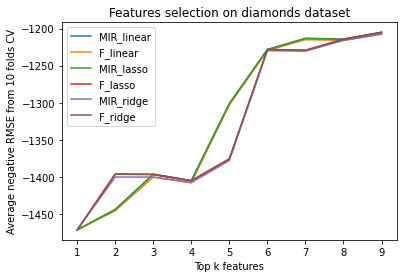

In [ ]:
plt.plot(range(1, diamonds_df.shape[1] + 1, 1), MIR_linear_diamond)
plt.plot(range(1, diamonds_df.shape[1] + 1, 1), MIR_lasso_diamond)
plt.plot(range(1, diamonds_df.shape[1] + 1, 1), MIR_ridge_diamond)
plt.plot(range(1, diamonds_df.shape[1] + 1, 1), F_linear_diamond)
plt.plot(range(1, diamonds_df.shape[1] + 1, 1), F_lasso_diamond)
plt.plot(range(1, diamonds_df.shape[1] + 1, 1), F_ridge_diamond)
plt.legend(["MIR_linear", "F_linear", "MIR_lasso", "F_lasso", "MIR_ridge", "F_ridge"],loc='best')
plt.xlabel('Top k features')
plt.ylabel('Average negative RMSE from 10 folds CV')
plt.title('Features selection on diamonds dataset')
plt.show()

# WITHOUT SELECTING IMPORTANT FEATURES
QUESTION 7 - NO FEATURE SELECTION AND
QUESTION 10 - FEATURE SCALING

# SCALED

In [ ]:
def regression(input, label, reg_type="linear"):
    if reg_type == "linear":
        output = cross_validate(LinearRegression(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    if reg_type == "lasso":
        output = cross_validate(Lasso(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    if reg_type == "ridge":
        output = cross_validate(Ridge(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    return output

LINEAR

In [ ]:
output = regression(diamonds_features, diamond_labels, reg_type="linear")
linear_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
print(linear_diamond_rmse)

-1205.045050850952


LASSO

In [ ]:
output = regression(diamonds_features, diamond_labels, reg_type="lasso")
lasso_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
print(lasso_diamond_rmse)

-1206.47984346142


RIDGE

In [ ]:
output = regression(diamonds_features, diamond_labels, reg_type="ridge")
ridge_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
print(ridge_diamond_rmse)

-1205.1310365943568


# NOT SCALED

LINEAR

In [ ]:
output = regression(diamonds_df, diamond_labels, reg_type="linear")
linear_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
print(linear_diamond_rmse)

-1205.0450508509844


LASSO

In [ ]:
output = regression(diamonds_df, diamond_labels, reg_type="lasso")
lasso_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
print(lasso_diamond_rmse)

-1207.5208338943323


RIDGE

In [ ]:
output = regression(diamonds_df, diamond_labels, reg_type="ridge")
ridge_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
print(ridge_diamond_rmse)

-1205.4172956940292


# QUESTION 9 & 10 - BEST REGULARIZATION SCHEME WITH OPTIMAL PENALTY PARAMETER

FROM THE PLOT ABOVE, WE CHOSE K = 6

In [ ]:
k = 6

diamonds_df has data that has not been scaled.\
diamonds_features has data that has been scaled. \
diamond_labels has labels.

In [ ]:
param_grid = {
    'regression__alpha': [10.0**x for x in np.arange(-4,4)]
}

WITHOUT FEATURE SCALING - QUESTION 9

F-REGRESSION, LINEAR REGRESSION

In [ ]:
input_k_modified = select(diamonds_df, diamond_labels, k=k, func="f")
output = regression(input_k_modified, diamond_labels, reg_type="linear")
F_linear_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
print("Linear regression with f-regression feature selection, no feature scaling: Test RMSE= {}".format(F_linear_diamond_rmse))

Linear regression with f-regression feature selection, no feature scaling: Test RMSE= -1228.2203041711923


F-REGRESSION, LASSO REGRESSION

In [ ]:
lasso_pipeline = Pipeline([('regression', Lasso())])
lasso_f_modified = select(diamonds_df, diamond_labels, k=k, func="f")

In [ ]:
diamonds_f_lasso = GridSearchCV(lasso_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(lasso_f_modified, diamond_labels)
print('Lasso regression with f-regression feature selection, no feature scaling: Test RMSE= {}, best alpha= {}'.format(diamonds_f_lasso.best_score_, diamonds_f_lasso.best_params_))

Lasso regression with f-regression feature selection, no feature scaling: Test RMSE= -1228.2204401402764, best alpha= {'regression__alpha': 0.0001}


F-REGRESSION, RIDGE REGRESSION

In [ ]:
ridge_pipeline = Pipeline([('regression', Ridge())])
ridge_f_modified = select(diamonds_df, diamond_labels, k=k, func="f")

In [ ]:
diamonds_f_ridge = GridSearchCV(ridge_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(ridge_f_modified, diamond_labels)
print('Ridge regression with f-regression feature selection, no feature scaling: Test RMSE= {}, best alpha= {}'.format(diamonds_f_ridge.best_score_, diamonds_f_ridge.best_params_))

Ridge regression with f-regression feature selection, no feature scaling: Test RMSE= -1228.2203326507108, best alpha= {'regression__alpha': 0.0001}


MI-REGRESSION, LINEAR REGRESSION

In [ ]:
input_k_modified = select(diamonds_df, diamond_labels, k=k, func="mutual")
output = regression(input_k_modified, diamond_labels, reg_type="linear")
MIR_linear_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
print("Linear regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= {}".format(MIR_linear_diamond_rmse))

Linear regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= -1228.2203041711923


MI-REGRESSION, LASSO REGRESSION

In [ ]:
lasso_pipeline = Pipeline([('regression', Lasso())])
lasso_mi_modified = select(diamonds_df, diamond_labels, k=k, func="mutual")

In [ ]:
diamonds_mi_lasso = GridSearchCV(lasso_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(lasso_mi_modified, diamond_labels)
print('Lasso regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= {}, best alpha= {}'.format(diamonds_mi_lasso.best_score_, diamonds_mi_lasso.best_params_))

Lasso regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= -1228.2204401402764, best alpha= {'regression__alpha': 0.0001}


MI-REGRESSION, RIDGE REGRESSION

In [ ]:
ridge_pipeline = Pipeline([('regression', Ridge())])
ridge_mi_modified = select(diamonds_df, diamond_labels, k=k, func="mutual")

In [ ]:
diamonds_mi_ridge = GridSearchCV(ridge_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(ridge_mi_modified, diamond_labels)
print('Ridge regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= {}, best alpha= {}'.format(diamonds_mi_ridge.best_score_, diamonds_mi_ridge.best_params_))

Ridge regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= -1228.2203326507108, best alpha= {'regression__alpha': 0.0001}


WITH FEATURE SCALING - QUESTION 10

F-REGRESSION, LINEAR REGRESSION

In [ ]:
input_k_modified = select(diamonds_features, diamond_labels, k=k, func="f")
output = regression(input_k_modified, diamond_labels, reg_type="linear")
F_linear_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
print("Linear regression with f-regression feature selection and with feature scaling: Test RMSE= {}".format(F_linear_diamond_rmse))

Linear regression with f-regression feature selection and with feature scaling: Test RMSE= -1228.2203041711086


F-REGRESSION, LASSO REGRESSION

In [ ]:
lasso_pipeline = Pipeline([('regression', Lasso())])
lasso_f_modified = select(diamonds_features, diamond_labels, k=k, func="f")

In [ ]:
diamonds_f_lasso = GridSearchCV(lasso_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(lasso_f_modified, diamond_labels)
print('Lasso regression with f-regression feature selection and with feature scaling: Test RMSE= {}, best alpha= {}'.format(diamonds_f_lasso.best_score_, diamonds_f_lasso.best_params_))

Lasso regression with f-regression feature selection and with feature scaling: Test RMSE= -1228.2203823068367, best alpha= {'regression__alpha': 0.0001}


F-REGRESSION, RIDGE REGRESSION

In [ ]:
ridge_pipeline = Pipeline([('regression', Ridge())])
ridge_f_modified = select(diamonds_features, diamond_labels, k=k, func="f")

In [ ]:
diamonds_f_ridge = GridSearchCV(ridge_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(ridge_f_modified, diamond_labels)
print('Ridge regression with f-regression feature selection and with feature scaling: Test RMSE= {}, best alpha= {}'.format(diamonds_f_ridge.best_score_, diamonds_f_ridge.best_params_))

Ridge regression with f-regression feature selection and with feature scaling: Test RMSE= -1228.2203100438624, best alpha= {'regression__alpha': 0.0001}


MI-REGRESSION, LINEAR REGRESSION

In [ ]:
input_k_modified = select(diamonds_features, diamond_labels, k=k, func="mutual")
output = regression(input_k_modified, diamond_labels, reg_type="linear")
MI_linear_diamond_rmse = output["test_neg_root_mean_squared_error"].mean()
print("Linear regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= {}".format(MI_linear_diamond_rmse))

Linear regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= -1228.2203041711086


MI-REGRESSION, LASSO REGRESSION

In [ ]:
lasso_pipeline = Pipeline([('regression', Lasso())])
lasso_mi_modified = select(diamonds_features, diamond_labels, k=k, func="mutual")

In [ ]:
diamonds_mi_lasso = GridSearchCV(lasso_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(lasso_mi_modified, diamond_labels)
print('Lasso regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= {}, best alpha= {}'.format(diamonds_mi_lasso.best_score_, diamonds_mi_lasso.best_params_))

Lasso regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= -1228.2203823068367, best alpha= {'regression__alpha': 0.0001}


MI-REGRESSION, RIDGE REGRESSION

In [ ]:
ridge_pipeline = Pipeline([('regression', Ridge())])
ridge_mi_modified = select(diamonds_features, diamond_labels, k=k, func="mutual")

In [ ]:
diamonds_mi_ridge = GridSearchCV(ridge_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(ridge_mi_modified, diamond_labels)
print('Ridge regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= {}, best alpha= {}'.format(diamonds_mi_ridge.best_score_, diamonds_mi_ridge.best_params_))

Ridge regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= -1228.2203100438624, best alpha= {'regression__alpha': 0.0001}


P-VALUES - QUESTION 11

In [ ]:
p_val = OLS(diamond_labels, diamonds_df).fit()
print(p_val.pvalues.sort_values())

carat       0.000000e+00
color       0.000000e+00
clarity     0.000000e+00
cut        4.517350e-212
x          8.216234e-106
depth       2.554568e-35
z           3.321856e-06
y           1.049686e-03
table       6.025587e-01
dtype: float64


# POLYNOMIAL

In [ ]:
def search_salient(grid, train, label, salient, k, l='diamond'):
    select = SelectKBest(score_func=f_regression, k=k)
    X_transformed = select.fit_transform(train, label)
    col = train.columns[select.get_support()]
    b_params = grid.best_estimator_.get_params()
    b_coefs = b_params['model'].coef_
    b_feature_name = list(col)
    b_names = b_params['PR'].get_feature_names(b_feature_name)
    b_sorted_indice = np.argsort(-abs(b_coefs))
    salient_features =[b_names[i] for i in b_sorted_indice[:salient]]
    print ('Top {} Salient features of {} Dataset:'.format(salient, l), salient_features)

In [ ]:
degrees = list(range(1,5))

pipe_diamond = Pipeline([
    ('PR', PolynomialFeatures()),
    ('model', Ridge())
])

param_grid = {
    'PR__degree': degrees,
    'model__alpha': [10.0 ** x for x in np.arange(-3,4)]
}


In [ ]:
def grid_analysis(degrees, dataset):
    res = pd.DataFrame(dataset.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
    score = []
    train = []
    alpha = []
    for degree in degrees:
        score.append((res.loc[res['param_PR__degree'] == degree]).max().mean_test_score)
        train.append((res.loc[res['param_PR__degree'] == degree]).max().mean_train_score)
        alpha.append(float(res['param_model__alpha'][
            (res.loc[res['param_PR__degree'] == degree])
            [['mean_test_score']].idxmax()].to_numpy()))
    plot_grid(degrees, score, train)
    return score, train, alpha

In [ ]:
def plot_grid(degrees, score, train):
    plt.plot(degrees,score, label='Test')
    plt.plot(degrees,train, label='Train')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Average RMSE')
    plt.title('Result of Different Polynomial Degree on the Diamond Dataset')
    plt.legend(loc='best')
    plt.show()

In [ ]:
grid_diamond = GridSearchCV(pipe_diamond, param_grid=param_grid, cv=10, n_jobs=-1, verbose=True, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(diamonds_features,diamond_labels)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print('Best parameters: {}, Test RMSE: {}'.format(grid_diamond.best_params_, grid_diamond.best_score_))
print('Train RMSE:',min(grid_diamond.cv_results_['mean_train_score']))

Best parameters: {'PR__degree': 1, 'model__alpha': 0.001}, Test RMSE: -1205.0451366986913
Train RMSE: -1248.6992639076075


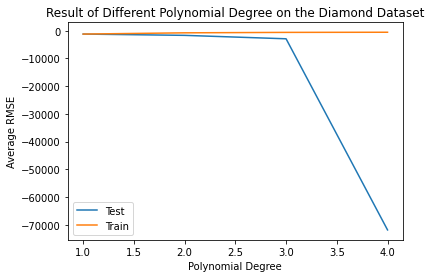

In [ ]:
diamond_score, diamond_train, diamond_alpha = grid_analysis(degrees, grid_diamond)

SALIENT FEATURES

In [ ]:
search_salient(grid_diamond, diamonds_df, diamond_labels, 5, 9)

Top 5 Salient features of diamond Dataset: ['carat', 'x', 'clarity', 'color', 'cut']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


QUESTION 14 - NEW FEATURES

In [ ]:
diamonds_new_df = diamonds_df.copy()

In [ ]:
diamonds_new_df.insert(2, "volume", diamonds_new_df['x'] * diamonds_new_df['y'] * diamonds_new_df['z'])

In [ ]:
diamonds_new_df.pop("x")
diamonds_new_df.pop("y")
diamonds_new_df.pop("z")

0        2.43
1        2.31
2        2.31
3        2.63
4        2.75
         ... 
53935    3.50
53936    3.61
53937    3.56
53938    3.74
53939    3.64
Name: z, Length: 53940, dtype: float64

In [ ]:
diamonds_new_df.tail(5)

,carat,cut,volume,color,clarity,depth,table
53935,0.72,5,115.920000,1,3,60.8,57.0
53936,0.72,2,118.110175,1,3,63.1,55.0
53937,0.70,3,114.449728,1,3,62.8,60.0
53938,0.86,4,140.766120,5,2,61.0,58.0
53939,0.75,5,124.568444,1,2,62.2,55.0


In [ ]:
diamonds_scaler_volume= StandardScaler()
diamonds_features_with_volume = diamonds_scaler_volume.fit_transform(diamonds_new_df)

In [ ]:
degrees = list(range(1,5))

pipe_diamond_volume = Pipeline([
    ('PR', PolynomialFeatures()),
    ('model', Ridge())
])

param_grid_volume = {
    'PR__degree': degrees,
    'model__alpha': [10.0 ** x for x in np.arange(-3,4)]
}


In [ ]:
grid_diamond_volume = GridSearchCV(pipe_diamond_volume, param_grid=param_grid_volume, cv=10, n_jobs=-1, verbose=True, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(diamonds_features_with_volume,diamond_labels)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [ ]:
print('Best parameters: {}, Test RMSE: {}'.format(grid_diamond_volume.best_params_, grid_diamond_volume.best_score_))
print('Train RMSE:',min(grid_diamond_volume.cv_results_['mean_train_score']))

Best parameters: {'PR__degree': 2, 'model__alpha': 100.0}, Test RMSE: -947.0043930796379
Train RMSE: -1240.446966261358


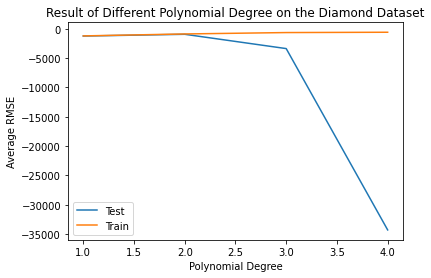

In [ ]:
diamond_score, diamond_train, diamond_alpha = grid_analysis(degrees, grid_diamond_volume)

In [ ]:
search_salient(grid_diamond_volume, diamonds_new_df, diamond_labels, 5, 7)

Top 5 Salient features of diamond Dataset: ['carat', 'clarity', 'carat clarity', 'volume', 'color']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# NEURAL NETWORKS

In [ ]:
hidden_layers = [(10), (20), (10, 10), (10, 20), (20, 10), (20, 20), (10, 10, 10), (10, 10, 20), (10, 20, 10), (10, 20, 20), (20, 10, 10), (20, 10, 20), (20, 20, 10), (20, 20, 20)]

In [ ]:
pipe_diamond = Pipeline([
    ('model', MLPRegressor(max_iter=500))
])

param_grid = {
    'model__hidden_layer_sizes': hidden_layers,
    'model__alpha': [10.0 ** x for x in np.arange(-3,2)],
    'model__activation': ['logistic', 'tanh', 'relu']
}

In [ ]:
grid_diamond = GridSearchCV(pipe_diamond, param_grid=param_grid, cv=10, n_jobs=-1, verbose=True, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(diamonds_features,diamond_labels)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 68.5min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 108.4min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed: 177.5min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed: 244.3min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed: 282.7min finished
C:\Users\Jayanth Shreekumar\.conda\envs\219Project4\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
nn_res = pd.DataFrame(grid_diamond.cv_results_)[['mean_test_score','mean_train_score','param_model__alpha','param_model__activation','param_model__hidden_layer_sizes']]
print('Best parameters: {}, Test RMSE: {}'.format(grid_diamond.best_params_, grid_diamond.best_score_))

Best parameters: {'model__activation': 'relu', 'model__alpha': 0.1, 'model__hidden_layer_sizes': (20, 20)}, Test RMSE: -624.7486434427943


# RANDOM FOREST 

In [ ]:
max_features = np.arange(1,11,1)
n_estimators = np.arange(10, 50, 10)
max_depth = np.arange(1, 10, 1)

pipe_RF = Pipeline([
    ('model', RandomForestRegressor(random_state=42, oob_score=True))
])

param_grid_RF = {
    'model__max_features': max_features,
    'model__n_estimators': n_estimators,
    'model__max_depth': max_depth
}

In [ ]:
grid_diamond_RF = GridSearchCV(pipe_RF, param_grid=param_grid_RF, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(diamonds_features, diamond_labels) # input and label

In [ ]:
def grid_analysis_RF(dataset):
    res = pd.DataFrame(dataset.cv_results_)[['mean_test_score','mean_train_score','param_model__max_features','param_model__n_estimators','param_model__max_depth']]
    best_params = dataset.best_params_
    best_score = dataset.best_score_
    print('Train RMSE:',max(res.mean_train_score))
    print('Best parameters: {}, Test RMSE: {}'.format(best_params, best_score))
    return res

In [ ]:
def plot_grid_RF(res, depth, feature, estimator, n_estimators, max_features, max_depth, label='Diamond'):
    score1 = list((res[(res['param_model__max_depth'] == depth) & (res['param_model__max_features'] == feature)]).mean_test_score)
    train1 = list((res[(res['param_model__max_depth'] == depth) & (res['param_model__max_features'] == feature)]).mean_train_score)
    plt.plot(n_estimators,score1, label='Test')
    plt.plot(n_estimators,train1, label='Train')
    plt.xlabel('Number of trees')
    plt.ylabel('RMSE')
    plt.title('Result of Different Tree Number on the {} Dataset'.format(label))
    plt.legend(loc='best')
    plt.show()
    
    score2 = list((res[(res['param_model__max_depth'] == depth) & (res['param_model__n_estimators'] == estimator)]).mean_test_score)
    train2 = list((res[(res['param_model__max_depth'] == depth) & (res['param_model__n_estimators'] == estimator)]).mean_train_score)
    plt.plot(max_features,score2, label='Test')
    plt.plot(max_features,train2, label='Train')
    plt.xlabel('Number of Max Features')
    plt.ylabel('RMSE')
    plt.title('Result of Different Max Features on the {} Dataset'.format(label))
    plt.legend(loc='best')
    plt.show()
    
    score3 = list((res[(res['param_model__max_features'] == feature) & (res['param_model__n_estimators'] == estimator)]).mean_test_score)
    train3 = list((res[(res['param_model__max_features'] == feature) & (res['param_model__n_estimators'] == estimator)]).mean_train_score)
    plt.plot(max_depth,score3, label='Test')
    plt.plot(max_depth,train3, label='Train')
    plt.xlabel('Depth of Tree')
    plt.ylabel('RMSE')
    plt.title('Result of Different Tree Depth on the {} Dataset'.format(label))
    plt.legend(loc='best')
    plt.show()

In [ ]:
def OOB(input_data, labels, depth, feature, estimator, dataset_name='Diamond'):
    model = RandomForestRegressor(random_state=42,max_depth=depth,
                                         max_features=feature, n_estimators=estimator, oob_score=True).fit(input_data, labels)
    oob_score = model.oob_score_
    print('The OOB Score of the {} Dataset:{}'.format(dataset_name, oob_score))

In [ ]:
diamond_RF_grid = grid_analysis_RF(grid_diamond_RF)

Train RMSE: -525.1215686708144
Best parameters: {'model__max_depth': 9, 'model__max_features': 7, 'model__n_estimators': 40}, Test RMSE: -817.5781859812084


In [ ]:
OOB(diamonds_features, diamond_labels, 9, 7, 40)

The OOB Score of the Diamond Dataset:0.9783228630016374


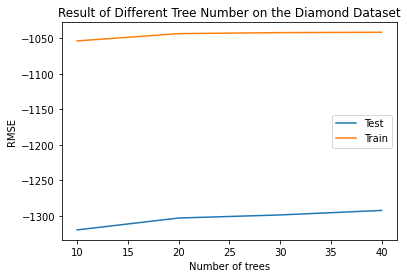

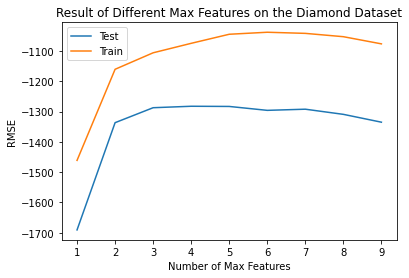

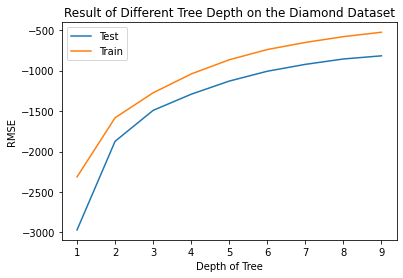

In [ ]:
max_features = np.arange(1,11,1).reshape(10)
n_estimators = np.arange(10, 50, 10).reshape(4)
max_depth = np.arange(1, 10, 1).reshape(9)
plot_grid_RF(diamond_RF_grid, 4, 7, 40, n_estimators, max_features, max_depth, label='Diamond')

## TREE VIZ

In [ ]:
def tree_viz(input_data, labels, depth, feature, estimator, k, dataset_name='Diamond'):
    model = RandomForestRegressor(random_state=42,max_depth=depth,
                                         max_features=feature, n_estimators=estimator, oob_score=True).fit(input_data, labels)
    select = SelectKBest(score_func=f_regression, k=k)
    X_transformed = select.fit_transform(input_data, labels)
    col = input_data.columns[select.get_support()]
    tree = model.estimators_[1]
    export_graphviz(tree, out_file = dataset_name + '_tree.dot', feature_names = col, rounded = True, precision = 1)
    (graph, ) = pydot.graph_from_dot_file(dataset_name + '_tree.dot')
    return graph

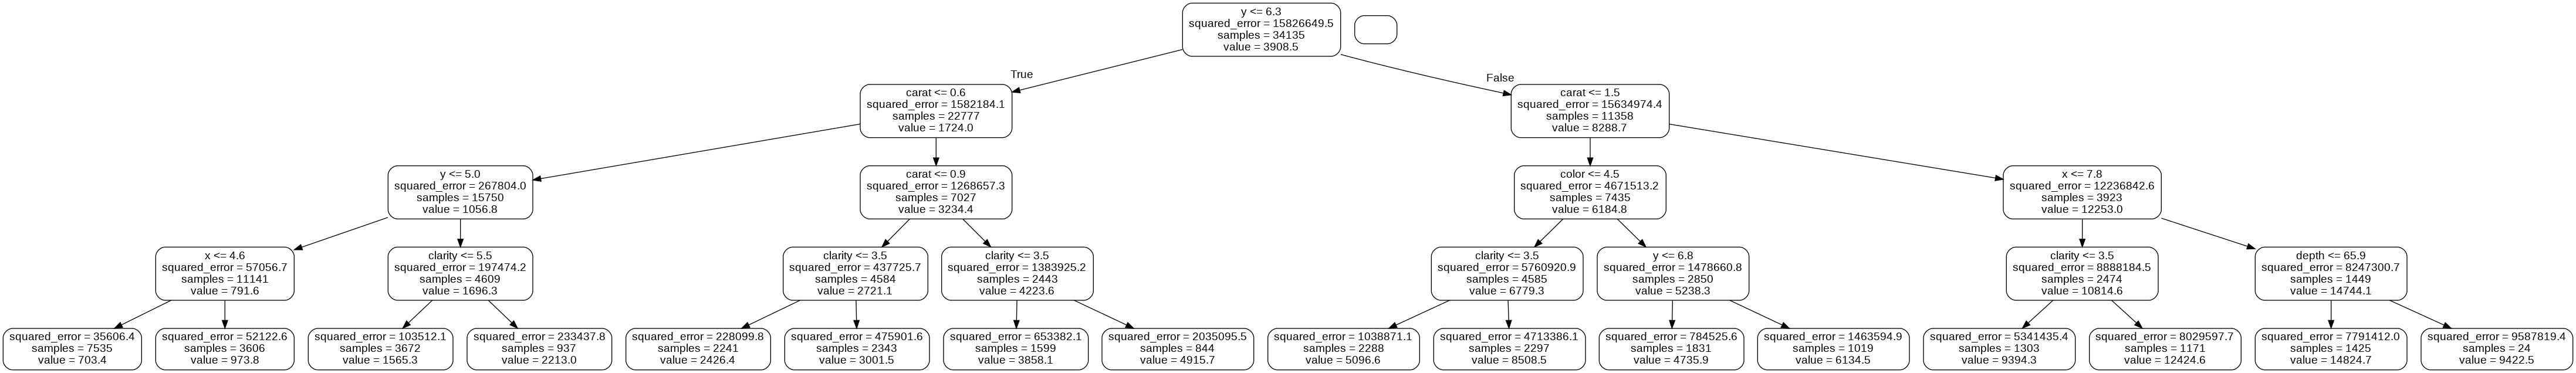

In [ ]:
graph = tree_viz(diamonds_df, diamond_labels, 4, 7, 40, 9)
Image(graph.create_png())

# BOOSTING METHODS

LIGHTGBM - QUESTION 23

In [ ]:
bscvlgbm = BayesSearchCV(
    lgb.LGBMRegressor(verbose=1,n_jobs=-1),
    {
        'boosting_type': ['gbdt','rf'],
        'num_leaves': np.arange(20,500,10),
        'max_depth': np.arange(1,100,10),
        'n_estimators': np.arange(10,1000,100),
        'reg_alpha': [10.0**x for x in np.arange(-3,4)],
        'reg_lambda': [10.0**x for x in np.arange(-3,4)],
        'subsample': np.arange(0.1,1,0.1),
        'subsample_freq': np.arange(0,50,5),
        'min_split_gain': [10.0**x for x in np.arange(-4,0)],
        'bagging_freq': [1],
        'bagging_fraction': [0.1]
    },
    n_iter=20,
    cv=10,
    n_jobs=-1,
    verbose=1,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

In [ ]:
res = bscvlgbm.fit(diamonds_features, diamond_labels)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [ ]:
print('Best parameters :',bscvlgbm.best_params_,',Test RMSE:',bscvlgbm.best_score_)
print('Train RMSE:',min(bscvlgbm.cv_results_['mean_train_score']))

Best parameters : OrderedDict([('bagging_fraction', 0.1), ('bagging_freq', 1), ('boosting_type', 'gbdt'), ('max_depth', 51), ('min_split_gain', 0.001), ('n_estimators', 510), ('num_leaves', 390), ('reg_alpha', 0.1), ('reg_lambda', 100.0), ('subsample', 0.4), ('subsample_freq', 15)]) ,Test RMSE: -582.3995119242237
Train RMSE: -2231.3409996247774


QUESTION 24

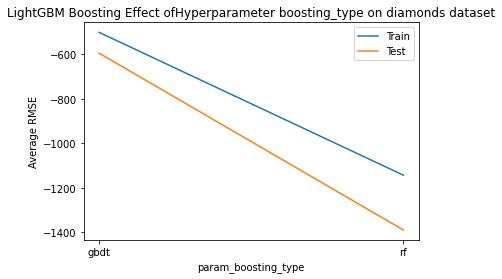

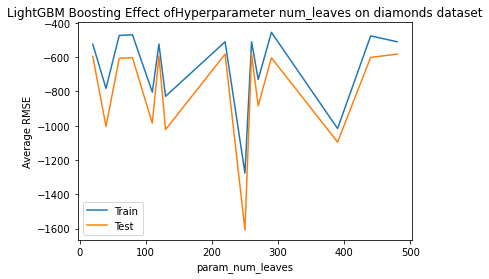

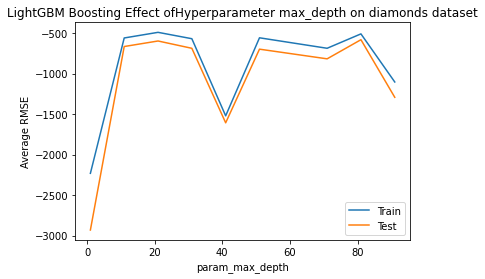

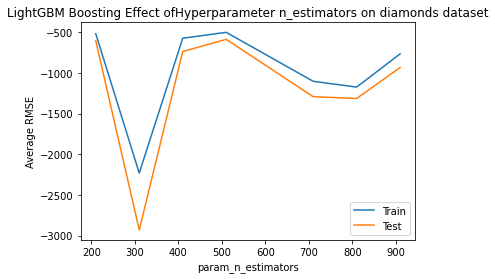

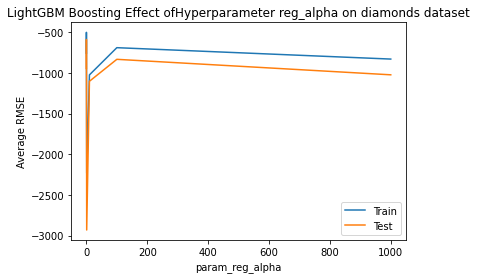

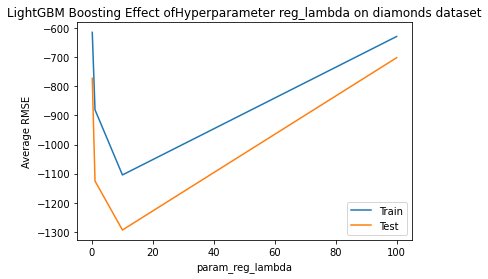

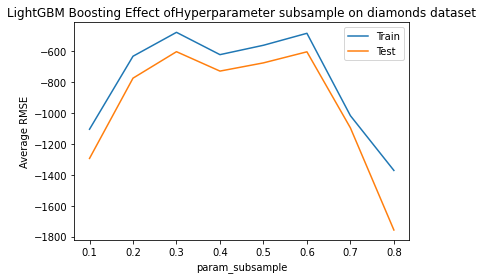

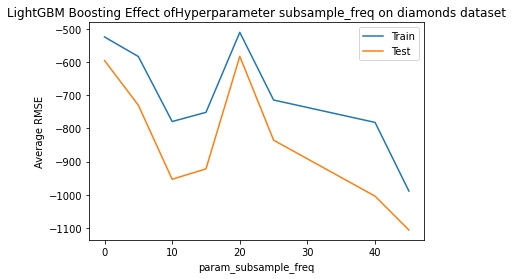

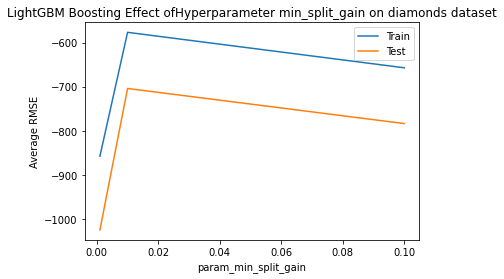

In [ ]:
param_list = ['param_boosting_type','param_num_leaves','param_max_depth','param_n_estimators',
             'param_reg_alpha','param_reg_lambda','param_subsample','param_subsample_freq',
              'param_min_split_gain'] 
for param in param_list:
    s = sorted(list(set(bscvlgbm.cv_results_[param])))
    train_mean = []
    test_mean = []
    for item in s:
        train = []
        test = []
        for i, x in enumerate(bscvlgbm.cv_results_[param]):
            if x == item:
                train.append([bscvlgbm.cv_results_['mean_train_score'][i]])
                test.append([bscvlgbm.cv_results_['mean_test_score'][i]])
        train_mean.append(np.mean(train))
        test_mean.append(np.mean(test))

    plt.plot(s,train_mean,label="Train")
    plt.plot(s,test_mean,label="Test")
    plt.legend()
    plt.xlabel(param)
    plt.ylabel('Average RMSE')
    plt.title("LightGBM Boosting Effect ofHyperparameter %s on diamonds dataset" % param[6:])
    plt.show()

CATBOOST - QUESTION 23

In [ ]:
bscvcat = BayesSearchCV(
    CatBoostRegressor(random_state=42,verbose=1,thread_count=-1,bootstrap_type='Bayesian'), 
    {
        'colsample_bylevel': np.arange(0.1,1,0.1),
        'num_trees': np.arange(10,2000,100),
        'l2_leaf_reg': [10.0**x for x in np.arange(-3,4)],
        'num_leaves': np.arange(20,500,10),
        'max_depth': np.arange(1,100,10),
        'bagging_temperature': np.arange(0.1,10,1),
        'grow_policy': ['Lossguide'],
        
    },
    n_iter=20,
    cv=10,
    n_jobs=-1,
    verbose=1,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

In [ ]:
res = bscvcat.fit(diamonds_features, diamond_labels)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [ ]:
print('Best parameters :',bscvcat.best_params_,',Test RMSE:',bscvcat.best_score_)
print('Train RMSE:',min(bscvcat.cv_results_['mean_train_score']))

Best parameters : OrderedDict([('bagging_temperature', 5.1), ('colsample_bylevel', 0.4), ('grow_policy', 'Lossguide'), ('l2_leaf_reg', 10.0), ('max_depth', 11), ('num_leaves', 130), ('num_trees', 1110)]) ,Test RMSE: -597.2248643829734
Train RMSE: -1256.9094429260751


QUESTION 24

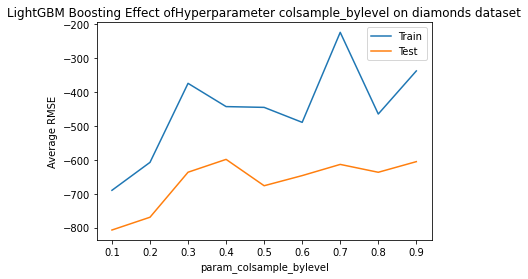

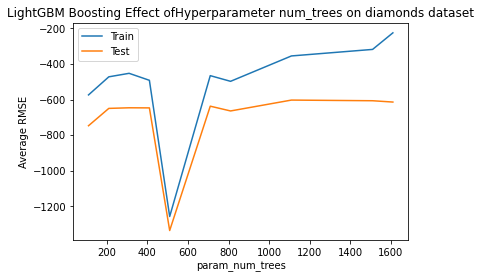

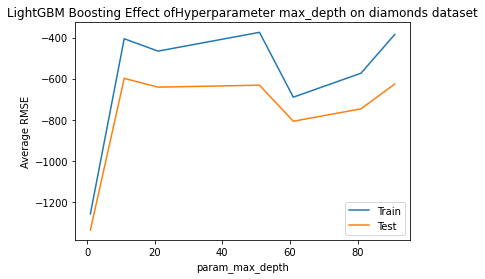

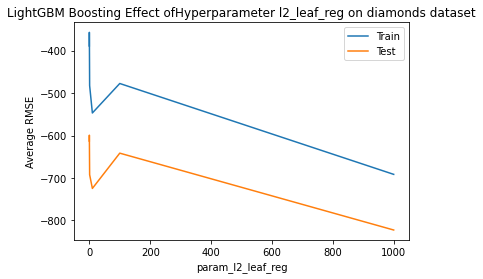

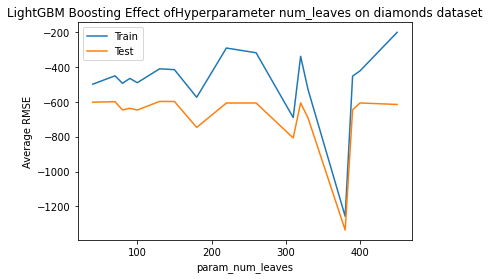

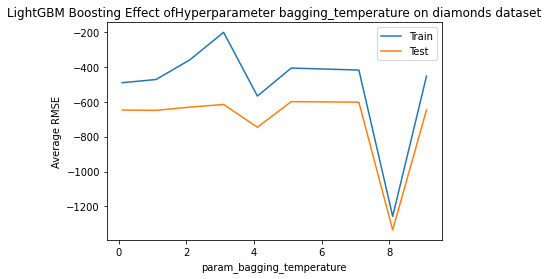

In [ ]:
param_list = ['param_colsample_bylevel','param_num_trees','param_max_depth','param_l2_leaf_reg',
              'param_num_leaves','param_bagging_temperature']
for param in param_list:
    s = sorted(list(set(bscvcat.cv_results_[param])))
    train_mean = []
    test_mean = []
    for item in s:
        train = []
        test = []
        for i, x in enumerate(bscvcat.cv_results_[param]):
            if x == item:
                train.append([bscvcat.cv_results_['mean_train_score'][i]])
                test.append([bscvcat.cv_results_['mean_test_score'][i]])
        train_mean.append(np.mean(train))
        test_mean.append(np.mean(test))

    plt.plot(s,train_mean,label="Train")
    plt.plot(s,test_mean,label="Test")
    plt.legend()
    plt.xlabel(param)
    plt.ylabel('Average RMSE')
    plt.title("LightGBM Boosting Effect ofHyperparameter %s on diamonds dataset" % param[6:])
    plt.show()

# GAS EMISSION REGRESSION ANALYSIS FOR CO

In [ ]:
gas_1_df = pd.read_csv("./Dataset/Gas_Emission/gt_2011.csv")
gas_2_df = pd.read_csv("./Dataset/Gas_Emission/gt_2012.csv")
gas_3_df = pd.read_csv("./Dataset/Gas_Emission/gt_2013.csv")
gas_4_df = pd.read_csv("./Dataset/Gas_Emission/gt_2014.csv")
gas_5_df = pd.read_csv("./Dataset/Gas_Emission/gt_2015.csv")

In [ ]:
gas_1_df["YEAR"] = 1
gas_2_df["YEAR"] = 2
gas_3_df["YEAR"] = 3
gas_4_df["YEAR"] = 4
gas_5_df["YEAR"] = 5

In [ ]:
gas_df = pd.concat([gas_1_df, gas_2_df, gas_3_df, gas_4_df, gas_5_df], axis=0)

In [ ]:
g_df = gas_df
gas_df.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,YEAR
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,1
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,1
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,1
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,1
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,1


In [ ]:
print(gas_1_df.shape)
print(gas_2_df.shape)
print(gas_3_df.shape)
print(gas_4_df.shape)
print(gas_5_df.shape)

(7411, 12)
(7628, 12)
(7152, 12)
(7158, 12)
(7384, 12)


In [ ]:
gas_df.shape

(36733, 12)

In [ ]:
gas_df = gas_df.drop(columns=["NOX"])

QUESTION 2 - PEARSON CORRELATION COEFFICIENT

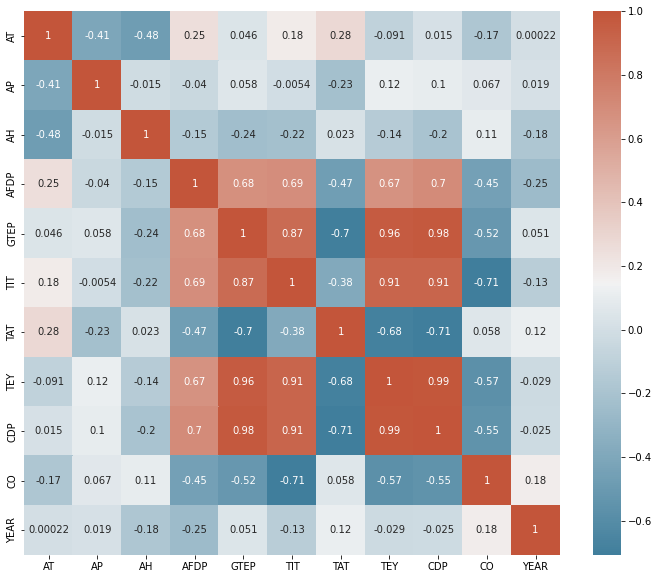

In [ ]:
gas_corr = gas_df.corr()

f, ax = plt.subplots(figsize=(12, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(gas_corr, annot=True, cmap=cmap)

In [ ]:
gas_labels = gas_df.pop("CO")

In [ ]:
print(gas_labels)

0        0.32663
1        0.44784
2        0.45144
3        0.23107
4        0.26747
          ...   
7379    10.99300
7380    11.14400
7381    11.41400
7382     3.31340
7383    11.98100
Name: CO, Length: 36733, dtype: float64


In [ ]:
print(gas_df)

          AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1     4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2     3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3     3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4     3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

      YEAR  
0        1  
1        1  


QUESTION 1 - STANDARDIZATION

In [ ]:
gas_scaler = StandardScaler()
gas_features = gas_scaler.fit_transform(gas_df)

In [ ]:
scaled_gas_labels = (gas_labels - gas_labels.mean()) / gas_labels.std()

QUESTION 3 - HISTOGRAMS

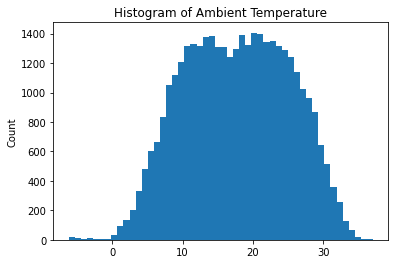

In [ ]:
AT = gas_df["AT"].values

plt.hist(AT, bins=50)
plt.title("Histogram of Ambient Temperature")
plt.ylabel("Count")
plt.show()

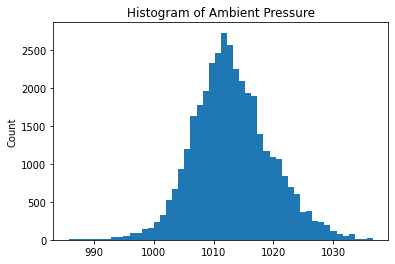

In [ ]:
AP = gas_df["AP"].values

plt.hist(AP, bins=50)
plt.title("Histogram of Ambient Pressure")
plt.ylabel("Count")
plt.show()

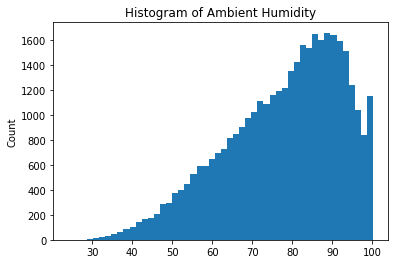

In [ ]:
AH = gas_df["AH"].values

plt.hist(AH, bins=50)
plt.title("Histogram of Ambient Humidity")
plt.ylabel("Count")
plt.show()

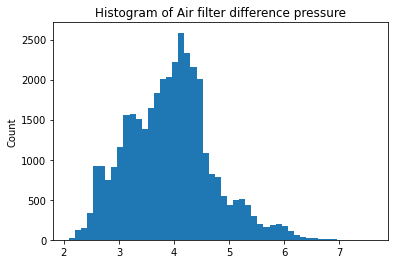

In [ ]:
AFDP = gas_df["AFDP"].values

plt.hist(AFDP, bins=50)
plt.title("Histogram of Air filter difference pressure")
plt.ylabel("Count")
plt.show()

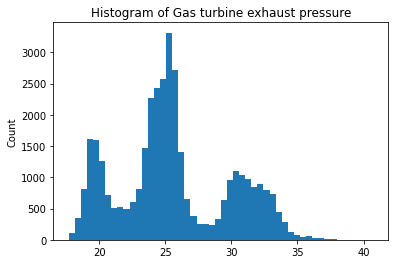

In [ ]:
GTEP = gas_df["GTEP"].values

plt.hist(GTEP, bins=50)
plt.title("Histogram of Gas turbine exhaust pressure")
plt.ylabel("Count")
plt.show()

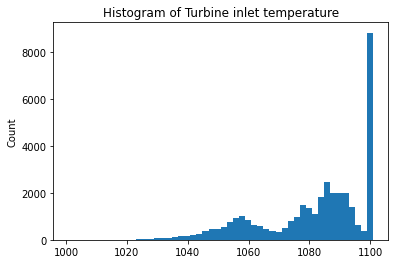

In [ ]:
TIT = gas_df["TIT"].values

plt.hist(TIT, bins=50)
plt.title("Histogram of Turbine inlet temperature")
plt.ylabel("Count")
plt.show()

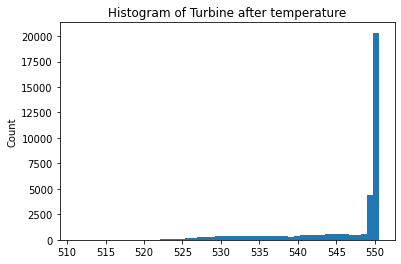

In [ ]:
TAT = gas_df["TAT"].values

plt.hist(TAT, bins=50)
plt.title("Histogram of Turbine after temperature")
plt.ylabel("Count")
plt.show()

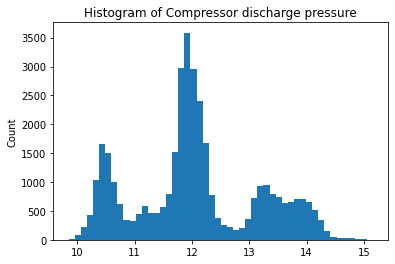

In [ ]:
CDP = gas_df["CDP"].values

plt.hist(CDP, bins=50)
plt.title("Histogram of Compressor discharge pressure")
plt.ylabel("Count")
plt.show()

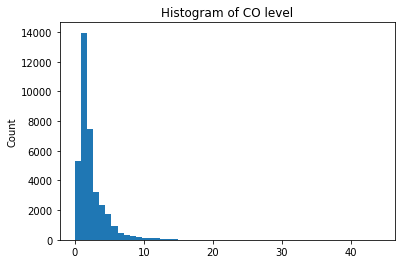

In [ ]:
plt.hist(gas_labels, bins=50)
plt.title("Histogram of CO level")
plt.ylabel("Count")
plt.show()

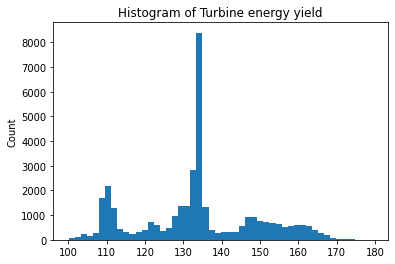

In [ ]:
TEY = gas_df["TEY"].values

plt.hist(TEY, bins=50)
plt.title("Histogram of Turbine energy yield")
plt.ylabel("Count")
plt.show()

QUESTION 6 - YEARLY TRENDS

In [ ]:
def plot_corr(df, yr):
  df = df.drop(columns=["NOX"])
  gas_1_labels = df.pop("CO")
  df = (df - df.mean()) / df.std()
  gas_1_labels = (gas_1_labels - gas_1_labels.mean()) / gas_1_labels.std()
  AT_1 = df["AT"].values
  AP_1 = df["AP"].values
  AH_1 = df["AH"].values
  AFDP_1 = df["AFDP"].values
  GTEP_1 = df["GTEP"].values
  TIT_1 = df["TIT"].values
  TAT_1 = df["TAT"].values
  CDP_1 = df["CDP"].values
  TEY_1 = df["TEY"].values
  AT = np.add.reduceat(AT_1, range(0, len(AT_1), len(AT_1) // 12))[:-1] / (len(AT_1) // 12)
  AP = np.add.reduceat(AP_1, range(0, len(AP_1), len(AP_1) // 12))[:-1] / (len(AP_1) // 12)
  AH = np.add.reduceat(AH_1, range(0, len(AH_1), len(AH_1) // 12))[:-1] / (len(AH_1) // 12)
  AFDP = np.add.reduceat(AFDP_1, range(0, len(AFDP_1), len(AFDP_1) // 12))[:-1] / (len(AFDP_1) // 12)
  GTEP = np.add.reduceat(GTEP_1, range(0, len(GTEP_1), len(GTEP_1) // 12))[:-1] / (len(GTEP_1) // 12)
  TIT = np.add.reduceat(TIT_1, range(0, len(TIT_1), len(TIT_1) // 12))[:-1] / (len(TIT_1) // 12)
  TAT = np.add.reduceat(TAT_1, range(0, len(TAT_1), len(TAT_1) // 12))[:-1] / (len(TAT_1) // 12)
  CDP = np.add.reduceat(CDP_1, range(0, len(CDP_1), len(CDP_1) // 12))[:-1] / (len(CDP_1) // 12)
  TEY = np.add.reduceat(TEY_1, range(0, len(TEY_1), len(TEY_1) // 12))[:-1] / (len(TEY_1) // 12)
  gas_1_labels = gas_1_labels.to_numpy()
  gas_labels = np.add.reduceat(gas_1_labels, range(0, len(gas_1_labels), len(gas_1_labels) // 12))[:-1] / (len(gas_1_labels) // 12)
  # plot
  figure(figsize=(8, 6), dpi=80)
  plt.plot(range(len(AT)), AT, label="Temperature")
  plt.plot(range(len(AP)), AP, label="Pressure")
  plt.plot(range(len(AH)), AH, label="Humidity")
  plt.plot(range(len(AH)), AFDP, label="Air filter difference pressure")
  plt.plot(range(len(AH)), GTEP, label="Gas turbine exhaust pressure")
  plt.plot(range(len(AH)), TIT, label="Turbine inlet temperature")
  plt.plot(range(len(AH)), TAT, label="Turbine after temperature")
  plt.plot(range(len(AH)), CDP, label="Compressor discharge pressure")
  plt.plot(range(len(AH)), TEY, label="Turbine energy yield")
  plt.plot(range(len(gas_labels)), gas_labels, label="CO Level")
  plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
  plt.xlabel("Month")
  plt.ylabel("Mean of value after standardization")
  plt.title("Yearly Trend of {}".format(yr))
  plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
  plt.show()

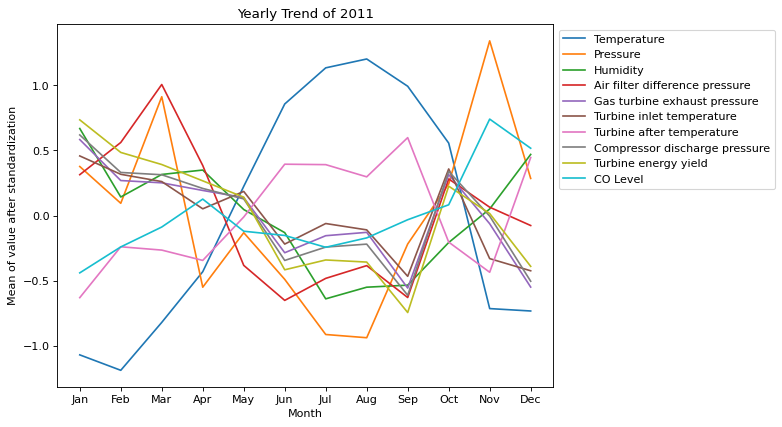

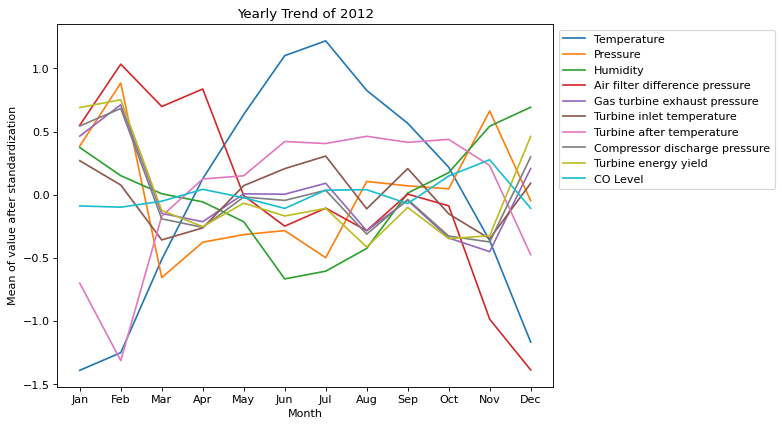

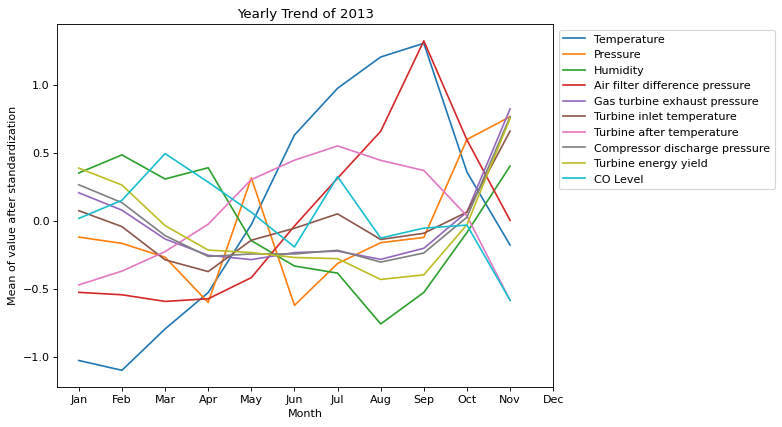

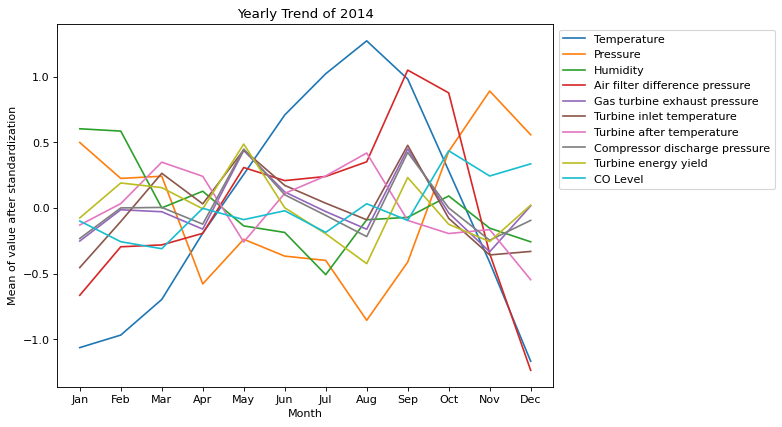

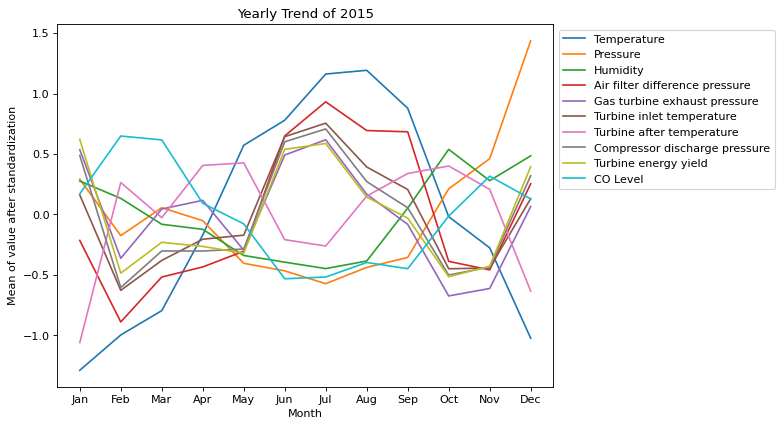

In [ ]:
plot_corr(gas_1_df, "2011")
plot_corr(gas_2_df, "2012")
plot_corr(gas_3_df, "2013")
plot_corr(gas_4_df, "2014")
plot_corr(gas_5_df, "2015")

# WITH SELECTING IMPORTANT FEATURES

# MUTUAL INFO REGRESSION

QUESTION 7 - FEATURE SELECTION

In [ ]:
def select(input, label, k, func="f"): # input the the features and label is price, for example
  if func == "mutual":
    k_model = SelectKBest(mutual_info_regression, k=k).fit(input, label)
  if func == "f":
    k_model = SelectKBest(f_regression, k=k).fit(input, label)
  input_new = k_model.transform(input)
  return input_new

In [ ]:
def regression(input, label, reg_type="linear"):
    if reg_type == "linear":
        output = cross_validate(LinearRegression(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    if reg_type == "lasso":
        output = cross_validate(Lasso(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    if reg_type == "ridge":
        output = cross_validate(Ridge(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    return output

LINEAR

In [ ]:
MIR_linear_gas = list()
for k in range(1, gas_df.shape[1] + 1):
    input_k_modified = select(gas_df, gas_labels, k=k, func="mutual")
    output = regression(input_k_modified, gas_labels, reg_type="linear")
    MIR_linear_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
    MIR_linear_gas.append(MIR_linear_gas_rmse)

LASSO

In [ ]:
MIR_lasso_gas = list()
for k in range(1, gas_df.shape[1] + 1):
    input_k_modified = select(gas_df, gas_labels, k=k, func="mutual")
    output = regression(input_k_modified, gas_labels, reg_type="lasso")
    MIR_lasso_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
    MIR_lasso_gas.append(MIR_lasso_gas_rmse)

RIDGE

In [ ]:
MIR_ridge_gas = list()
for k in range(1, gas_df.shape[1] + 1):
    input_k_modified = select(gas_df, gas_labels, k=k, func="mutual")
    output = regression(input_k_modified, gas_labels, reg_type="ridge")
    MIR_ridge_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
    MIR_ridge_gas.append(MIR_ridge_gas_rmse)

# F REGRESSION

LINEAR

In [ ]:
F_linear_gas = list()
for k in range(1, gas_df.shape[1] + 1):
    input_k_modified = select(gas_df, gas_labels, k=k, func="f")
    output = regression(input_k_modified, gas_labels, reg_type="linear")
    F_linear_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
    F_linear_gas.append(F_linear_gas_rmse)

LASSO

In [ ]:
F_lasso_gas = list()
for k in range(1, gas_df.shape[1] + 1):
    input_k_modified = select(gas_df, gas_labels, k=k, func="f")
    output = regression(input_k_modified, gas_labels, reg_type="lasso")
    F_lasso_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
    F_lasso_gas.append(F_lasso_gas_rmse)

RIDGE

In [ ]:
F_ridge_gas = list()
for k in range(1, gas_df.shape[1] + 1):
    input_k_modified = select(gas_df, gas_labels, k=k, func="f")
    output = regression(input_k_modified, gas_labels, reg_type="ridge")
    F_ridge_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
    F_ridge_gas.append(F_ridge_gas_rmse)

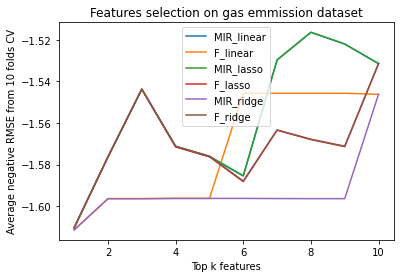

In [ ]:
plt.plot(range(1, gas_df.shape[1] + 1, 1), MIR_linear_gas)
plt.plot(range(1, gas_df.shape[1] + 1, 1), MIR_lasso_gas)
plt.plot(range(1, gas_df.shape[1] + 1, 1), MIR_ridge_gas)
plt.plot(range(1, gas_df.shape[1] + 1, 1), F_linear_gas)
plt.plot(range(1, gas_df.shape[1] + 1, 1), F_lasso_gas)
plt.plot(range(1, gas_df.shape[1] + 1, 1), F_ridge_gas)
plt.legend(["MIR_linear", "F_linear", "MIR_lasso", "F_lasso", "MIR_ridge", "F_ridge"],loc='best')
plt.xlabel('Top k features')
plt.ylabel('Average negative RMSE from 10 folds CV')
plt.title('Features selection on gas emmission dataset')
plt.show()

# SCALED

In [ ]:
def regression(input, label, reg_type="linear"):
    if reg_type == "linear":
        output = cross_validate(LinearRegression(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    if reg_type == "lasso":
        output = cross_validate(Lasso(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    if reg_type == "ridge":
        output = cross_validate(Ridge(), input, label, scoring=['neg_root_mean_squared_error'], cv=10, n_jobs=-1)
    return output

LINEAR

In [ ]:
output = regression(gas_features, gas_labels, reg_type="linear")
linear_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
print(linear_gas_rmse)

-1205.045050850952


LASSO

In [ ]:
output = regression(gas_features, gas_labels, reg_type="lasso")
lasso_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
print(lasso_gas_rmse)

-1206.47984346142


RIDGE

In [ ]:
output = regression(gas_features, gas_labels, reg_type="ridge")
ridge_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
print(ridge_gas_rmse)

-1205.1310365943568


# NOT SCALED

LINEAR

In [ ]:
output = regression(gas_df, gas_labels, reg_type="linear")
linear_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
print(linear_gas_rmse)

-1205.0450508509844


LASSO

In [ ]:
output = regression(gas_df, gas_labels, reg_type="lasso")
lasso_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
print(lasso_gas_rmse)

-1207.5208338943323


RIDGE

In [ ]:
output = regression(gas_df, gas_labels, reg_type="ridge")
ridge_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
print(ridge_gas_rmse)

-1205.4172956940292


# QUESTION 9 & 10 - BEST REGULARIZATION SCHEME WITH OPTIMAL PENALTY PARAMETER

In [ ]:
k_mir_linear = 8
k_mir_lasso = 6
k_mir_ridge = 8
k_f_linear = 3
k_f_lasso = 10
k_f_ridge = 3

gas_df has data that has not been scaled.\
gas_features has data that has been scaled. \
gas_labels has labels.

In [ ]:
param_grid = {
    'regression__alpha': [10.0**x for x in np.arange(-4,4)]
}

WITHOUT FEATURE SCALING - QUESTION 9

F-REGRESSION, LINEAR REGRESSION

In [ ]:
input_k_modified = select(gas_df, gas_labels, k=k_f_linear, func="f")
output = regression(input_k_modified, gas_labels, reg_type="linear")
F_linear_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
print("Linear regression with f-regression feature selection, no feature scaling: Test RMSE= {}".format(F_linear_gas_rmse))

Linear regression with f-regression feature selection, no feature scaling: Test RMSE= -1.5436934865704717


F-REGRESSION, LASSO REGRESSION

In [ ]:
lasso_pipeline = Pipeline([('regression', Lasso(max_iter=3000))])
lasso_f_modified = select(gas_df, gas_labels, k=k_f_lasso, func="f")

In [ ]:
gas_f_lasso = GridSearchCV(lasso_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(lasso_f_modified, gas_labels)
print('Lasso regression with f-regression feature selection, no feature scaling: Test RMSE= {}, best alpha= {}'.format(gas_f_lasso.best_score_, gas_f_lasso.best_params_))

Lasso regression with f-regression feature selection, no feature scaling: Test RMSE= -1.4950089902657642, best alpha= {'regression__alpha': 0.1}


F-REGRESSION, RIDGE REGRESSION

In [ ]:
ridge_pipeline = Pipeline([('regression', Ridge())])
ridge_f_modified = select(gas_df, gas_labels, k=k_f_ridge, func="f")

In [ ]:
gas_f_ridge = GridSearchCV(ridge_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(ridge_f_modified, gas_labels)
print('Ridge regression with f-regression feature selection, no feature scaling: Test RMSE= {}, best alpha= {}'.format(gas_f_ridge.best_score_, gas_f_ridge.best_params_))

Ridge regression with f-regression feature selection, no feature scaling: Test RMSE= -1.5436256945383764, best alpha= {'regression__alpha': 100.0}


MI-REGRESSION, LINEAR REGRESSION

In [ ]:
input_k_modified = select(gas_df, gas_labels, k=k_mir_linear, func="mutual")
output = regression(input_k_modified, gas_labels, reg_type="linear")
MIR_linear_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
print("Linear regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= {}".format(MIR_linear_gas_rmse))

Linear regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= -1.5163336268243996


MI-REGRESSION, LASSO REGRESSION

In [ ]:
lasso_pipeline = Pipeline([('regression', Lasso(max_iter=3000))])
lasso_mi_modified = select(gas_df, gas_labels, k=k_mir_lasso, func="mutual")

In [ ]:
gas_mi_lasso = GridSearchCV(lasso_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(lasso_mi_modified, gas_labels)
print('Lasso regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= {}, best alpha= {}'.format(gas_mi_lasso.best_score_, gas_mi_lasso.best_params_))

Lasso regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= -1.5456871555774412, best alpha= {'regression__alpha': 1.0}


MI-REGRESSION, RIDGE REGRESSION

In [ ]:
ridge_pipeline = Pipeline([('regression', Ridge())])
ridge_mi_modified = select(gas_df, gas_labels, k=k_mir_ridge, func="mutual")

In [ ]:
gas_mi_ridge = GridSearchCV(ridge_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(ridge_mi_modified, gas_labels)
print('Ridge regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= {}, best alpha= {}'.format(gas_mi_ridge.best_score_, gas_mi_ridge.best_params_))

Ridge regression with mutual-info-regression feature selection, no feature scaling: Test RMSE= -1.5007979824698539, best alpha= {'regression__alpha': 1000.0}


WITH FEATURE SCALING - QUESTION 10

F-REGRESSION, LINEAR REGRESSION

In [ ]:
input_k_modified = select(gas_features, gas_labels, k=k_f_linear, func="f")
output = regression(input_k_modified, gas_labels, reg_type="linear")
F_linear_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
print("Linear regression with f-regression feature selection and with feature scaling: Test RMSE= {}".format(F_linear_gas_rmse))

Linear regression with f-regression feature selection and with feature scaling: Test RMSE= -1.543693486570531


F-REGRESSION, LASSO REGRESSION

In [ ]:
lasso_pipeline = Pipeline([('regression', Lasso(max_iter=3000))])
lasso_f_modified = select(gas_features, gas_labels, k=k_f_lasso, func="f")

In [ ]:
gas_f_lasso = GridSearchCV(lasso_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(lasso_f_modified, gas_labels)
print('Lasso regression with f-regression feature selection and with feature scaling: Test RMSE= {}, best alpha= {}'.format(gas_f_lasso.best_score_, gas_f_lasso.best_params_))

Lasso regression with f-regression feature selection and with feature scaling: Test RMSE= -1.5068752810725528, best alpha= {'regression__alpha': 0.01}


F-REGRESSION, RIDGE REGRESSION

In [ ]:
ridge_pipeline = Pipeline([('regression', Ridge())])
ridge_f_modified = select(gas_features, gas_labels, k=k_f_ridge, func="f")

In [ ]:
gas_f_ridge = GridSearchCV(ridge_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(ridge_f_modified, gas_labels)
print('Ridge regression with f-regression feature selection and with feature scaling: Test RMSE= {}, best alpha= {}'.format(gas_f_ridge.best_score_, gas_f_ridge.best_params_))

Ridge regression with f-regression feature selection and with feature scaling: Test RMSE= -1.5428278362977204, best alpha= {'regression__alpha': 100.0}


MI-REGRESSION, LINEAR REGRESSION

In [ ]:
input_k_modified = select(gas_features, gas_labels, k=k_mir_linear, func="mutual")
output = regression(input_k_modified, gas_labels, reg_type="linear")
MI_linear_gas_rmse = output["test_neg_root_mean_squared_error"].mean()
print("Linear regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= {}".format(MI_linear_gas_rmse))

Linear regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= -1.5163336268242897


MI-REGRESSION, LASSO REGRESSION

In [ ]:
lasso_pipeline = Pipeline([('regression', Lasso())])
lasso_mi_modified = select(gas_features, gas_labels, k=k_mir_lasso, func="mutual")

In [ ]:
gas_mi_lasso = GridSearchCV(lasso_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(lasso_mi_modified, gas_labels)
print('Lasso regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= {}, best alpha= {}'.format(gas_mi_lasso.best_score_, gas_mi_lasso.best_params_))

Lasso regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= -1.5456871555774412, best alpha= {'regression__alpha': 1.0}


MI-REGRESSION, RIDGE REGRESSION

In [ ]:
ridge_pipeline = Pipeline([('regression', Ridge())])
ridge_mi_modified = select(gas_features, gas_labels, k=k_mir_ridge, func="mutual")

In [ ]:
gas_mi_ridge = GridSearchCV(ridge_pipeline, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error').fit(ridge_mi_modified, gas_labels)
print('Ridge regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= {}, best alpha= {}'.format(gas_mi_ridge.best_score_, gas_mi_ridge.best_params_))

Ridge regression with mutual-info-regression feature selection and with feature scaling: Test RMSE= -1.507001289786319, best alpha= {'regression__alpha': 1000.0}


# POLYNOMIAL

In [ ]:
def search_salient(grid, train, label, salient, k, l='diamond'):
    select = SelectKBest(score_func=f_regression, k=k)
    X_transformed = select.fit_transform(train, label)
    col = train.columns[select.get_support()]
    b_params = grid.best_estimator_.get_params()
    b_coefs = b_params['model'].coef_
    b_feature_name = list(col)
    b_names = b_params['PR'].get_feature_names(b_feature_name)
    b_sorted_indice = np.argsort(-abs(b_coefs))
    salient_features =[b_names[i] for i in b_sorted_indice[:salient]]
    print ('Top {} Salient features of {} Dataset:'.format(salient, l), salient_features)

In [ ]:
degrees = list(range(1,6))

pipe_gas = Pipeline([
    ('PR', PolynomialFeatures()),
    ('model', Ridge(random_state=42))
])

param_grid = {
    'PR__degree': degrees,
    'model__alpha': [10.0 ** x for x in np.arange(-3,4)]
}

In [ ]:
grid_gas = GridSearchCV(pipe_gas, param_grid=param_grid, cv=10, n_jobs=-1, verbose=True, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(gas_features, gas_labels)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print('Best parameters: {}, Test RMSE: {}'.format(grid_gas.best_params_, grid_gas.best_score_))
print('Train RMSE:',min(grid_gas.cv_results_['mean_train_score']))

Best parameters: {'PR__degree': 3, 'model__alpha': 100.0}, Test RMSE: -1.2433786021923676
Train RMSE: -1.464232022192175


In [ ]:
def grid_analysis(degrees, dataset):
    res = pd.DataFrame(dataset.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
    score = []
    train = []
    alpha = []
    for degree in degrees:
        score.append((res.loc[res['param_PR__degree'] == degree]).max().mean_test_score)
        train.append((res.loc[res['param_PR__degree'] == degree]).max().mean_train_score)
        alpha.append(float(res['param_model__alpha'][
            (res.loc[res['param_PR__degree'] == degree])
            [['mean_test_score']].idxmax()].to_numpy()))
    plot_grid(degrees, score, train)
    return score, train, alpha
    
def plot_grid(degrees, score, train):
    plt.plot(degrees,score, label='Test')
    plt.plot(degrees,train, label='Train')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Average RMSE')
    plt.title('Result of Different Polynomial Degree on the Gas Dataset')
    plt.legend(loc='best')
    plt.show()

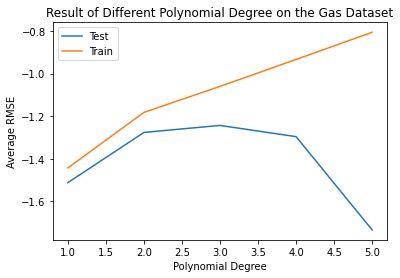

In [ ]:
gas_score, gas_train, gas_alpha = grid_analysis(degrees, grid_gas)

SALIENT FEATURES

In [ ]:
def search_salient(grid, train, label, salient, k, l='diamond'):
    select = SelectKBest(score_func=f_regression, k=k)
    X_transformed = select.fit_transform(train, label)
    col = train.columns[select.get_support()]
    b_params = grid.best_estimator_.get_params()
    b_coefs = b_params['model'].coef_
    b_feature_name = list(col)
    b_names = b_params['PR'].get_feature_names(b_feature_name)
    b_sorted_indice = np.argsort(-abs(b_coefs))
    salient_features =[b_names[i] for i in b_sorted_indice[:salient]]
    print ('Top {} Salient features of {} Dataset:'.format(salient, l), salient_features)

In [ ]:
search_salient(grid_gas, gas_df, gas_labels, 5, 10, l='gas')

Top 5 Salient features of gas Dataset: ['TAT', 'TIT TAT', 'TIT', 'TAT^2', 'TIT^2 YEAR']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# NEURAL NETWORKS

In [ ]:
hidden_layers = [(10), (20), (10, 10), (10, 20), (20, 10), (20, 20), (10, 10, 10), (10, 10, 20), (10, 20, 10), (10, 20, 20), (20, 10, 10), (20, 10, 20), (20, 20, 10), (20, 20, 20)]

In [ ]:
pipe_gas = Pipeline([
    ('model', MLPRegressor())
])

param_grid = {
    'model__hidden_layer_sizes': hidden_layers,
    'model__alpha': [10.0 ** x for x in np.arange(-3,2)],
    'model__activation': ['logistic', 'tanh', 'relu']
}

In [ ]:
grid_gas_NN = GridSearchCV(pipe_gas, param_grid=param_grid, cv=10, n_jobs=-1, verbose=True, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(gas_features,scaled_gas_labels)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


In [ ]:
res = pd.DataFrame(grid_gas_NN.cv_results_)[['mean_test_score','mean_train_score','param_model__alpha','param_model__activation','param_model__hidden_layer_sizes']]
print('Best parameters:',grid_gas_NN.best_params_,',Test RMSE:',grid_gas_NN.best_score_)
print('Train RMSE:',max(res.mean_train_score))

Best parameters: {'model__activation': 'relu', 'model__alpha': 0.01, 'model__hidden_layer_sizes': (20, 10)} ,Test RMSE: -0.55929516432594
Train RMSE: -0.39314068250693357


# RANDOM FOREST

In [ ]:
max_features = np.arange(1,11,1)
n_estimators = np.arange(10, 50, 10)
max_depth = np.arange(1, 10, 1)

pipe_RF = Pipeline([
    ('model', RandomForestRegressor(random_state=42, oob_score=True))
])

param_grid_RF = {
    'model__max_features': max_features,
    'model__n_estimators': n_estimators,
    'model__max_depth': max_depth
}

In [ ]:
grid_gas_RF = GridSearchCV(pipe_RF, param_grid=param_grid_RF, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(gas_features, scaled_gas_labels) # input and label

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


In [ ]:
gas_res = grid_analysis_RF(grid_gas_RF)

Train RMSE: -0.35133512028963876
Best parameters: {'model__max_depth': 9, 'model__max_features': 3, 'model__n_estimators': 30}, Test RMSE: -0.5684080614775568


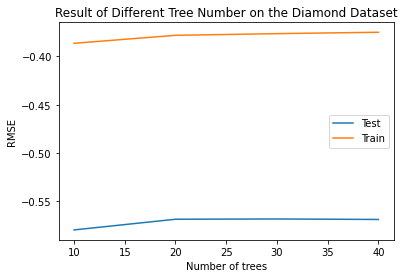

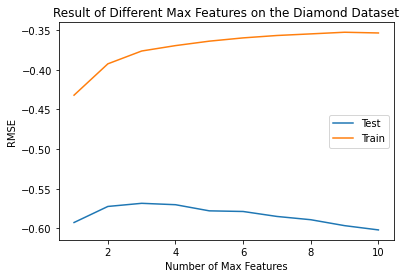

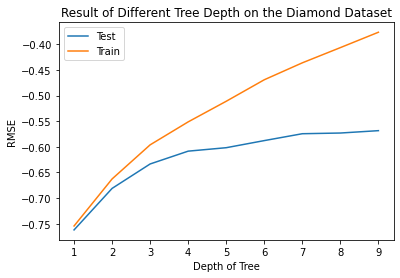

In [ ]:
max_features = np.arange(1,11,1).reshape(10)
n_estimators = np.arange(10, 50, 10).reshape(4)
max_depth = np.arange(1, 10, 1).reshape(9)
plot_grid_RF(gas_res, 9, 3, 30, n_estimators, max_features, max_depth, label='Gas')

In [ ]:
OOB(gas_features, scaled_gas_labels, 9, 3, 30, dataset_name='Gas')

The OOB Score of the Gas Dataset:0.7456312132190126
